# General k-means analysis

In [1]:
import math
import time
import random
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib.patches as mpatches
import numpy as np
from numpy import linalg
import scipy.io as sio
from sklearn.cluster import KMeans
from sklearn import metrics
from matplotlib.ticker import FormatStrFormatter


%matplotlib notebook

In [6]:
#   Description:
#Uploads dI/dV data that was preprocessed in Matlab, in the format of a '.mat' Matlab matrix
#   Parameters:
#Input:
#fileName = string of the full path and file name
#variableName = string of workspace variable name as it was in MATLAB
#Output:
#array = dI/dV matrix as a python array

def MATLAB_file_to_array(fileName, variableName):

    matrix = sio.loadmat(fileName)
    array = matrix[variableName]
    print("Shape of array: ",np.shape(array))
    
    return array

In [9]:
#   Description:
#runs k-means clustering algorithm on dI/dV grid map
#uses scipy library function: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
#uses k-means++ centroid generator for quicker optimization and is seeded for reproducibility
#   Parameters:
#Inputs:
#grid = array of dI/dV grid map in shape (x, y, energy)
#number_clusters = array of dI/dV grid map in shape (x, y, energy)
#Outputs:
#labels = array of k-mean cluster assignments in shape (x, y)
#centroids = array of k-means centroids in shape (number_clusters, energy)
#score = float of calculated BCSS/WCSS (Calinski-Harabasz Index) value. Higher values imply better fit 
#For details, see: https://scikit-learn.org/stable/modules/clustering.html#calinski-harabasz-index

def my_kmeans(grid, number_clusters):
    #Data needs to be in shape (n_samples, n_features), ie: (75625, 81) for k-means
    data = np.reshape(grid, (np.shape(grid)[0]*np.shape(grid)[1], np.shape(grid)[2]))
    kmeans = KMeans(n_clusters=number_clusters, init='k-means++',n_init=100, max_iter=100, random_state=0).fit(data)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    score = metrics.calinski_harabasz_score(data, labels)
    print('k-means complete. BCSS / WCSS = {:0.6e}'.format(score))
    
    return labels, centroids, score
labels, centroids, score = my_kmeans(data_5, 4)

k-means complete. BCSS / WCSS = 2.467402e+04


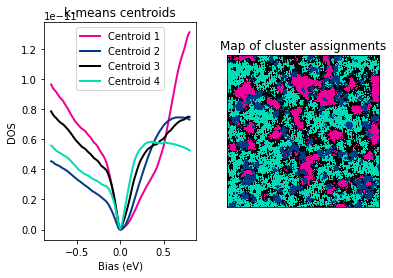

In [14]:
#   Description:
#plotting function for k-means output
#   Parameters:
#Inputs:
#grid = array of dI/dV grid map in shape (x, y, energy)
#minV = float, the first energy value
#maxV = float, the last energy value
#labels = array, output of k-mean cluster assignments in shape (x, y)
#centroids = array, output of k-means centroids in shape (number_clusters, energy)
#colours = array of strings, desired colour for each centroid
#Outpus: None

def kmeans_Plot(grid, minV, maxV, labels, centroids, colours):
    energy = np.linspace(minV, maxV, num=np.shape(grid)[2]) #evenly spaced values between minV and maxV
    img_labels = np.reshape(labels, (np.shape(grid)[0],np.shape(grid)[1])) #Reformating labels for map layout
    number_centroids = np.shape(centroids)[0]
    
    #Plotting
    fig,(ax1,ax2) = plt.subplots(1,2)
    fig.subplots_adjust(hspace=0.3)
    
    for i in range(number_centroids):
        ax1.plot(energy,centroids[i],label="Centroid "+str(i+1), marker='',linestyle='-', lw=2, color=colours[i])
    
    ax1.set_ylabel("DOS")
    ax1.set_xlabel("Bias (eV)")
    ax1.set_title("k-means centroids")
    ax1.legend()

    cmap = colors.ListedColormap(colours)
    ax2.imshow(img_labels, cmap=cmap)
    ax2.set_title("Map of cluster assignments")
    ax2.set_xticks([])
    ax2.set_yticks([])
    
    plt.show()
    
kmeans_Plot(data_5,-0.8,0.8,labels,centroids, ['#EF0096','#003C86','k','#00DCB5'])